In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

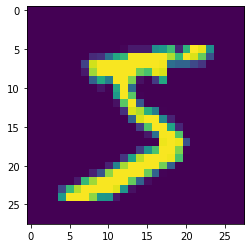

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_example = to_categorical(y_train)

In [11]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test = to_categorical(y_test, num_classes = 10)

In [14]:
y_cat_train = to_categorical(y_train, num_classes = 10)

In [15]:
single_image.max()

255

In [16]:
x_train = x_train / 255

In [17]:
x_test = x_test / 255

In [18]:
scaled_image = x_train[0]

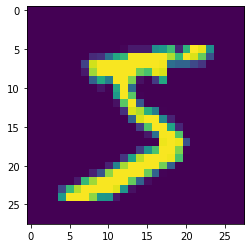

In [19]:
plt.imshow(scaled_image)

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train = x_train.reshape(60000, 28, 28, 1)


In [22]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                kernel_size = (4, 4),
                strides = (1, 1),
                padding = 'valid',
                input_shape = (28, 28, 1),
                activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [28]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_test, y_cat_test),
         callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1385 - accuracy: 0.9579 - val_loss: 0.0660 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0446 - val_accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0354 - val_accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0403 - val_accuracy: 0.9867


In [29]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

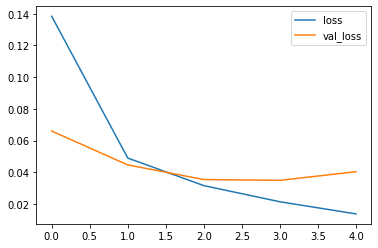

In [30]:
metrics[['loss', 'val_loss']].plot()

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.138466,0.957917,0.065983,0.9788
1,0.048918,0.985200,0.044597,0.9844
2,0.031521,0.990467,0.035362,0.9886
3,0.021321,0.992983,0.034855,0.9891
4,0.013654,0.995500,0.040314,0.9867


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
predictions = model.predict(x_test)

In [34]:
print(classification_report(y_test, predictions))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [35]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
print(classification_report(y_test, predictions))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [38]:
my_number = x_test['0']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [39]:
plt.imshow(my_number.reshape(28, 28))

NameError: name 'my_number' is not defined

In [40]:
model.predict(my_number.reshape(1,28, 28, 1))

NameError: name 'my_number' is not defined

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
from tensorflow.keras.datasets import cifar10

In [84]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [85]:
x_train.shape

(50000, 32, 32, 3)

In [86]:
x_train[0].shape

(32, 32, 3)

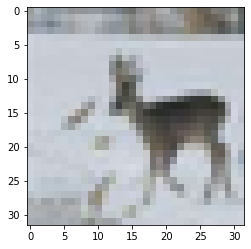

In [87]:
plt.imshow(x_train[20])

In [88]:
x_train[0].max()

255

In [89]:
x_train = x_train / 255

In [90]:
x_test = x_test / 255

In [91]:
x_test.shape

(10000, 32, 32, 3)

In [92]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [93]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [94]:
from tensorflow.keras.utils import to_categorical

In [95]:
y_cat_train = to_categorical(y_train, 10)

In [96]:
y_cat_test = to_categorical(y_test, 10)

In [97]:
y_test[0]

array([3], dtype=uint8)

In [98]:
y_train[0]

array([6], dtype=uint8)

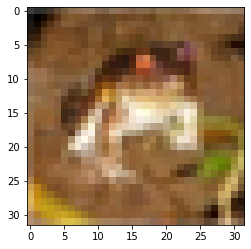

In [99]:
plt.imshow(x_train[0])

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [101]:
model = Sequential()
model.add(Conv2D(filters =32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters =32, kernel_size = (4, 4), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [104]:
x_train.shape

(50000, 32, 32, 3)

In [105]:
x_test.shape

(10000, 32, 32, 3)

In [106]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [107]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [108]:
x_test.shape

(10000, 32, 32, 3)

In [109]:
y_cat_test.shape

(10000, 10)

In [110]:
model.fit(x_train, y_cat_train, epochs = 15, 
         validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4848 - accuracy: 0.4623 - val_loss: 1.2549 - val_accuracy: 0.5476
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1486 - accuracy: 0.5947 - val_loss: 1.0945 - val_accuracy: 0.6144
Epoch 3/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9903 - accuracy: 0.6529 - val_loss: 0.9754 - val_accuracy: 0.6585
Epoch 4/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8754 - accuracy: 0.6931 - val_loss: 0.9448 - val_accuracy: 0.6702
Epoch 5/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7752 - accuracy: 0.7281 - val_loss: 0.9826 - val_accuracy: 0.6648
Epoch 6/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6914 - accuracy: 0.7580 - val_loss: 0.9380 - val_accuracy: 0.6838
Epoch 7/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6160 - accuracy: 0.7819 - val_loss: 0.9464 -

In [111]:
metrics = pd.DataFrame(model.history.history)

In [112]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

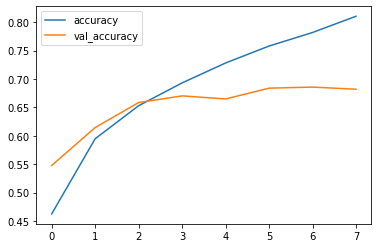

In [113]:
metrics[['accuracy', 'val_accuracy']].plot()

In [114]:
model.evaluate(x_test, y_cat_test, verbose = 0)

[0.9778946042060852, 0.6819000244140625]

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis = -1)


In [123]:
predictions

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [124]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.82      0.78      0.80      1000
           2       0.57      0.59      0.58      1000
           3       0.51      0.51      0.51      1000
           4       0.60      0.66      0.63      1000
           5       0.58      0.56      0.57      1000
           6       0.76      0.78      0.77      1000
           7       0.73      0.74      0.73      1000
           8       0.80      0.73      0.76      1000
           9       0.77      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [125]:
confusion_matrix(y_test, predictions)

array([[726,  16,  66,  24,  31,   5,  12,  17,  73,  30],
       [ 39, 778,  11,  10,   5,   9,  10,  10,  32,  96],
       [ 53,   3, 591,  64, 116,  61,  57,  32,  13,  10],
       [ 20,  11,  82, 511,  88, 157,  66,  37,  14,  14],
       [ 15,   5,  73,  66, 664,  50,  51,  62,  10,   4],
       [ 11,   2,  67, 181,  67, 556,  28,  73,   7,   8],
       [  7,   4,  52,  54,  54,  26, 783,   8,   8,   4],
       [ 20,   4,  43,  44,  68,  64,   7, 736,   5,   9],
       [ 93,  49,  26,  22,   9,  14,   9,   6, 729,  43],
       [ 55,  75,  19,  23,   6,  13,  10,  33,  21, 745]], dtype=int64)

<AxesSubplot:>

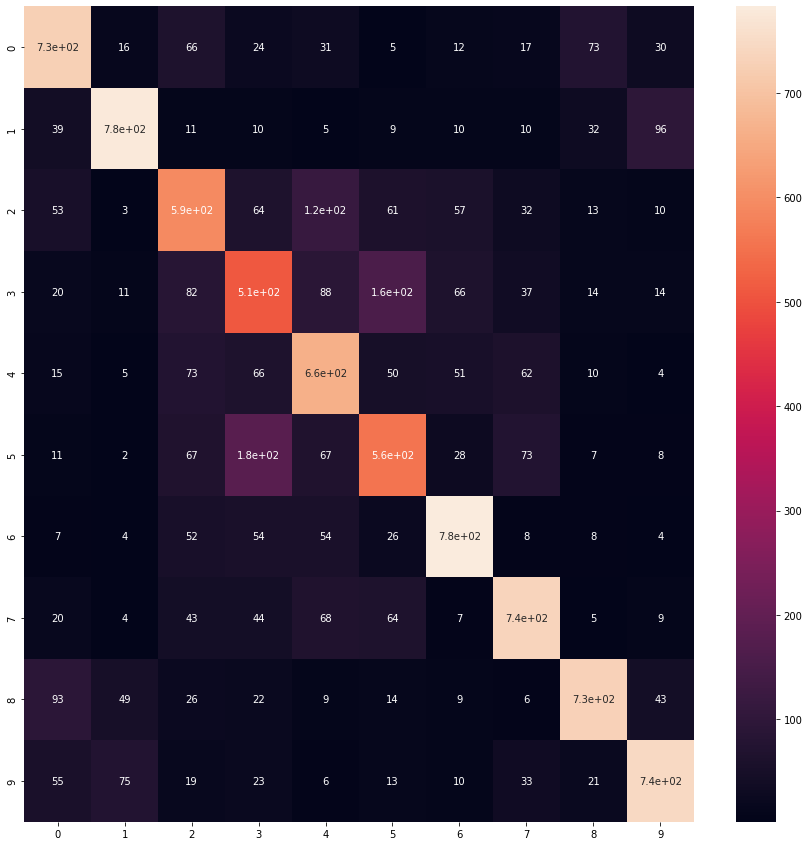

In [130]:
import seaborn as sns
plt.figure(figsize = (15, 15))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

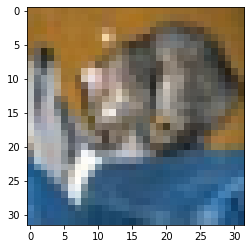

In [128]:
plt.imshow(x_test[0])